In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

Loading DataSet
emnist-digits.mat: This is a file of digits 0 to 9, but with more examples per class.
emnist-letters.mat: This is a file of letters a/A to z/Z. The lower and upper case letters are grouped into the same class.

In [2]:
import scipy.io
def load_emnist(file_path='emnist-digits.mat'):
 
        mat = scipy.io.loadmat(file_path)
 # Get the training data
        Xtr = mat['dataset'][0][0][0][0][0][0][:]
        ntr = Xtr.shape[0]
        ytr = mat['dataset'][0][0][0][0][0][1][:].reshape(ntr).astype(int)
     # Get the test data
        Xts = mat['dataset'][0][0][1][0][0][0][:]
        nts = Xts.shape[0]
        yts = mat['dataset'][0][0][1][0][0][1][:].reshape(nts).astype(int)
        print("%d training samples, %d test samples loaded" % (ntr, nts))
        return [Xtr, Xts, ytr, yts]

In [3]:
Xtr_dig, Xts_dig, ytr_dig, yts_dig = load_emnist()

240000 training samples, 40000 test samples loaded


In [4]:
import scipy.io
def load_emnist1(file_path='emnist-letters.mat'):
 
    mat = scipy.io.loadmat(file_path)

 # Get the training data
    Xtr = mat['dataset'][0][0][0][0][0][0][:]
    ntr = Xtr.shape[0]
    ytr = mat['dataset'][0][0][0][0][0][1][:].reshape(ntr).astype(int)

 # Get the test data
    Xts = mat['dataset'][0][0][1][0][0][0][:]
    nts = Xts.shape[0]
    yts = mat['dataset'][0][0][1][0][0][1][:].reshape(nts).astype(int)

    print("%d training samples, %d test samples loaded" % (ntr, nts))
    return [Xtr, Xts, ytr, yts]


In [5]:
Xtr_let, Xts_let, ytr_let, yts_let = load_emnist1()

124800 training samples, 20800 test samples loaded


function to plot the digits:

In [6]:
def plt_digit(x,y=None):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq.T, cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    if y != None:
        plt.title('%d' % y)

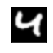

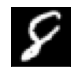

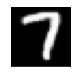

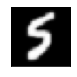

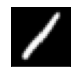

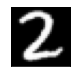

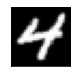

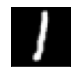

<Figure size 720x1440 with 0 Axes>

In [7]:
nplt = 8
nsamp = Xtr_dig.shape[0]
Iperm = np.random.permutation(nsamp)
# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt,i+1)
    plt_digit(Xtr_dig[ind,:])
    plt.figure(figsize=(10,20))

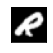

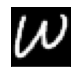

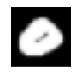

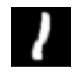

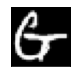

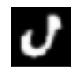

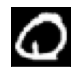

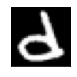

<Figure size 720x1440 with 0 Axes>

In [8]:
nplt = 8
nsamp = Xtr_let.shape[0]
Iperm = np.random.permutation(nsamp)
# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i] 
    plt.subplot(1,nplt,i+1)
    plt_digit(Xtr_let[ind,:])
    plt.figure(figsize=(10,20))

For fast training we group all the letters into a single class of letters.
Each digit would have it's own class.
Before Training we remove all the letters corresponding to i/I, l/L and o/O. The reason is that these letters would get confused with the digits 0 and 1.
Created arrays Xtr_let_rem and ytr_let_rem from the data Xtr_let and ytr_let, where the samples i with ytr_let[i] == 9, 12 or 15 are removed. Created Xts_let_rem and yts_let_rem similarly.

In [13]:
remove_list = np.array([9,12,15])
temp=[]
for i in range(124800):
    if(np.all(ytr_let[i]==9) or np.all(ytr_let[i]==12) or np.all(ytr_let[i]==15)):
        temp.append(i)
temp=np.array(temp)
#temp=np.reshape(temp,(14400,1))
ytr_let_rem=np.delete(ytr_let,temp)
Xtr_let_rem=np.delete(Xtr_let,temp,axis=0)
Xtr_let_rem.shape
Xtr_let.shape


(124800, 784)

In [10]:
temp1=[]
for i in range(20800):
    if(np.all(yts_let[i]==9) or np.all(yts_let[i]==12) or np.all(yts_let[i]==15)):
        temp1.append(i)
temp1=np.array(temp1)
#temp1=np.reshape(temp1,(2400,1))
yts_let_rem=np.delete(yts_let,temp1)
Xts_let_rem=np.delete(Xts_let,temp1,axis=0)

Since training and testing an SVM is VERY SLOW, we will use only a small subset of the training and test data

In [11]:
ntr_dig = 5000
ntr_let = 1000
nts_dig = 5000
nts_let = 1000

In [14]:
ytr_dig=np.reshape(ytr_dig,(240000,1))
temp=np.append(Xtr_dig,ytr_dig,axis=1)
temp.shape
Xtr_digtemp=temp[:,:784]
ytr_digtemp=temp[:,784]
Xtr1_dig=Xtr_digtemp[:5000,:]
ytr1_dig=ytr_digtemp[:5000]


In [15]:
yts_dig=np.reshape(yts_dig,(40000,1))
temp=np.append(Xts_dig,yts_dig,axis=1)
temp.shape
Xts_digtemp=temp[:,:784]
yts_digtemp=temp[:,784]
Xts1_dig=Xts_digtemp[:5000,:]
yts1_dig=yts_digtemp[:5000]


In [16]:
ytr_let_rem=np.reshape(ytr_let_rem,(110400,1))
temp=np.append(Xtr_let_rem,ytr_let_rem,axis=1)
temp.shape
Xtr_lettemp=temp[:,:784]
ytr_lettemp=temp[:,784]
Xtr1_let=Xtr_lettemp[:1000,:]
ytr1_let=ytr_lettemp[:1000]


In [17]:
yts_let_rem=np.reshape(yts_let_rem,(18400,1))
temp=np.append(Xts_let_rem,yts_let_rem,axis=1)
temp.shape
Xts_lettemp=temp[:,:784]
yts_lettemp=temp[:,784]
Xts1_let=Xts_lettemp[:1000,:]
yts1_let=yts_lettemp[:1000]

we create data by combining the digit and letter arrays.

Create an array Xtr by stacking Xtr1_dig, Xtr1_let. This should result in 6000 total samples.
Create a new label vector ytr where ytr[i] = ytr1_dig[i] for any digit sample and ytr[i]=10 for any letter sample. Thus, all the letters are lumped into a single class with label 11.


In [18]:
Xtr=np.vstack((Xtr1_dig,Xtr1_let))
Xts=np.vstack((Xts1_dig,Xts1_let))

In [25]:
for i in range(ntr_let):
    ytr1_let[i]=10
    yts1_let[i]=10

In [26]:
ytr=np.hstack((ytr1_dig,ytr1_let))
yts=np.hstack((yts1_dig,yts1_let))

In [27]:
Xtr1 = Xtr/255.0*2 - 1
Xts1 = Xts/255.0*2 - 1

Using an rbf classifier with C=2.8 and gamma=.0073 from SVM classifier

In [28]:
from sklearn import svm
svc = svm.SVC(probability=False, kernel="rbf", C=2.8, gamma=.0073)

In [29]:
svc.fit(Xtr1,ytr)
yhat_ts = svc.predict(Xts1)
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.916000


[[0.94  0.    0.    0.    0.002 0.002 0.004 0.    0.    0.    0.03 ]
 [0.    0.985 0.    0.    0.    0.    0.    0.    0.    0.    0.007]
 [0.004 0.002 0.901 0.    0.    0.    0.    0.008 0.006 0.    0.042]
 [0.    0.    0.008 0.913 0.    0.012 0.    0.002 0.01  0.    0.025]
 [0.    0.    0.    0.    0.877 0.    0.002 0.    0.    0.011 0.058]
 [0.002 0.    0.    0.008 0.    0.92  0.    0.    0.006 0.    0.032]
 [0.    0.    0.    0.    0.    0.008 0.923 0.    0.002 0.    0.033]
 [0.    0.    0.    0.    0.    0.    0.    0.973 0.    0.011 0.008]
 [0.    0.002 0.002 0.002 0.    0.002 0.    0.    0.885 0.006 0.05 ]
 [0.    0.002 0.    0.    0.    0.    0.    0.015 0.002 0.937 0.021]
 [0.046 0.006 0.038 0.019 0.036 0.    0.047 0.    0.051 0.006 0.872]]


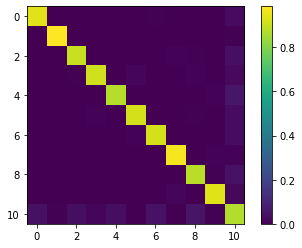

In [30]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts,yhat_ts)
# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]
# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [31]:
C_test = [0.1,1,10]
gam_test = [0.001,0.01,0.1]
nC = len(C_test)
ngam = len(gam_test)
acc = np.zeros((nC,ngam))


In [34]:
for i, c in enumerate(C_test):
    for j, gam in enumerate(gam_test):
        from sklearn import svm
        svc = svm.SVC(probability=False, kernel="rbf", C =c, gamma=gam)
        svc.fit(Xtr1,ytr)
        yhat_ts = svc.predict(Xts1)
        accuracy = np.mean(yhat_ts == yts)
        acc[i,j]=accuracy
print(acc)

    

[[0.79016667 0.58783333 0.16666667]
 [0.86883333 0.89566667 0.21816667]
 [0.90366667 0.90266667 0.22      ]]


In [40]:
accuracy=[]
for i in acc:
    print(i)
    accuracy.append(i)
print(accuracy)

[0.79016667 0.58783333 0.16666667]
[0.86883333 0.89566667 0.21816667]
[0.90366667 0.90266667 0.22      ]
[array([0.79016667, 0.58783333, 0.16666667]), array([0.86883333, 0.89566667, 0.21816667]), array([0.90366667, 0.90266667, 0.22      ])]


In [36]:
print('maximum accuracy is {}'.format(max(acc[0])))

maximum accuracy is 0.7901666666666667
